### Question 3 [5 points]

Next, recreate the following figure, which is much closer to the one in the lecture:

<img src="figures/annual-anomaly-new.png" width="700px" />

**Hints:** 
- in order to get that smooth curve, you'll need to use `from scipy.interpolate import CubicSpline`. You can find the documentation for `CubicSpline` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html).
- The "Seasonal Anomaly" inset graph can be created with `ax.inset_axes(...)`. You can treat the `Axes` object returned like any other `Axes` object.
- Remember that you can set the tick labels with `ax.set_xticks(...)`.
- To get the data points plotted as red dots, when you use `ax.plot(...)`, pass in `"r."` as the argument immediately following any data you pass in. The `"r"` indicates the color, while the `"."` indicates how the data will be plotted (if you don't put the `"."`, it will be a line instead).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_2198/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


In [3]:
def detrend(f):
    detrended_xarr = f.groupby('month').mean()
    detrended_xarr = detrended_xarr - detrended_xarr.mean()
    return detrended_xarr

dy = data.groupby('year')
c02anomaly = dy.apply(detrend)
# display(c02anomaly)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
monthly_anomaly

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


Text(0.5, 1.0, 'Seasonal Anomaly')

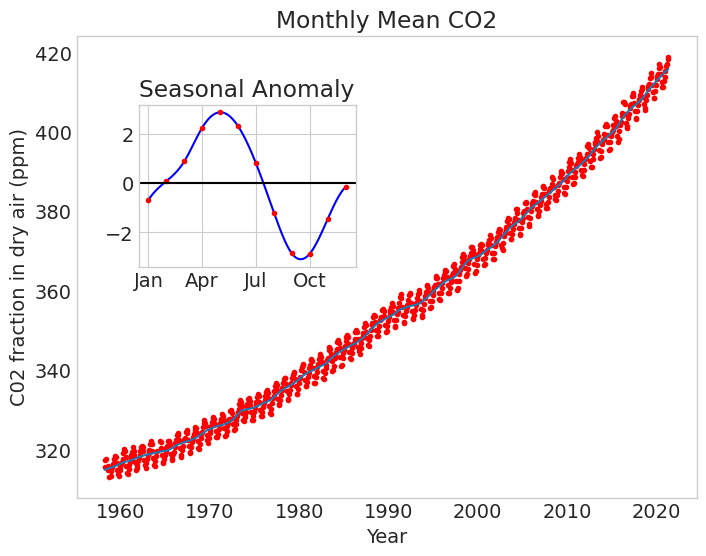

In [4]:
from scipy.interpolate import CubicSpline

month = monthly_anomaly.reset_index()['month']
cubicspline = CubicSpline(month, monthly_anomaly['c02'])

fig, ax = plt.subplots()
ax.plot(data['fraction_date'], data['data_filled'], 'r.')
ax.plot(data['fraction_date'], data['data_adjusted_seasonally_fit'])
ax.grid(False)
ax.set_xlabel('Year')
ax.set_ylabel('C02 fraction in dry air (ppm)')
ax.set_title('Monthly Mean CO2')

inset_graph = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
new_x = np.arange(1, 12, 0.0001)
inset_graph.plot(new_x, cubicspline(new_x), 'b')
inset_graph.plot(monthly_anomaly['c02'], 'r.')
inset_graph.axhline(y = 0, color = 'black')
inset_graph.set_xticks([1, 4, 7, 10], labels = ['Jan', 'Apr', 'Jul', 'Oct'])
inset_graph.set_title('Seasonal Anomaly')

If we look into the plot, it seems that the CO2 fraction in dry air has been constantly increasing from year 1960 to 2020. Moreover, we can see that the seasonal anomaly has been changing in a periodic way from January to October.

In [6]:
fig.savefig('outputs/hw3_Q03.png')